In [2]:
#Sanskruti Kakade Code Clause Project
#Speech Emotion Recgonition
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [3]:
Ravdess = "C:\\Users\DELL\\Code Clause Internship Tasks\\Audio\\audio_speech_actors_01-24\\"
Crema = "C:\\Users\\DELL\\Code Clause Internship Tasks\\Audio\AudioWAV\\"
Savee = "C:\\Users\\DELL\\Code Clause Internship Tasks\\Audio\\ALL\\"

In [4]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,C:\Users\DELL\Code Clause Internship Tasks\Aud...
1,neutral,C:\Users\DELL\Code Clause Internship Tasks\Aud...
2,neutral,C:\Users\DELL\Code Clause Internship Tasks\Aud...
3,neutral,C:\Users\DELL\Code Clause Internship Tasks\Aud...
4,calm,C:\Users\DELL\Code Clause Internship Tasks\Aud...


In [5]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,C:\Users\DELL\Code Clause Internship Tasks\Aud...
1,disgust,C:\Users\DELL\Code Clause Internship Tasks\Aud...
2,fear,C:\Users\DELL\Code Clause Internship Tasks\Aud...
3,happy,C:\Users\DELL\Code Clause Internship Tasks\Aud...
4,neutral,C:\Users\DELL\Code Clause Internship Tasks\Aud...


In [6]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,C:\Users\DELL\Code Clause Internship Tasks\Aud...
1,angry,C:\Users\DELL\Code Clause Internship Tasks\Aud...
2,angry,C:\Users\DELL\Code Clause Internship Tasks\Aud...
3,angry,C:\Users\DELL\Code Clause Internship Tasks\Aud...
4,angry,C:\Users\DELL\Code Clause Internship Tasks\Aud...


In [7]:
data_path = pd.concat([Ravdess_df, Crema_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,C:\Users\DELL\Code Clause Internship Tasks\Aud...
1,neutral,C:\Users\DELL\Code Clause Internship Tasks\Aud...
2,neutral,C:\Users\DELL\Code Clause Internship Tasks\Aud...
3,neutral,C:\Users\DELL\Code Clause Internship Tasks\Aud...
4,calm,C:\Users\DELL\Code Clause Internship Tasks\Aud...


In [9]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

<Figure size 1200x400 with 0 Axes>

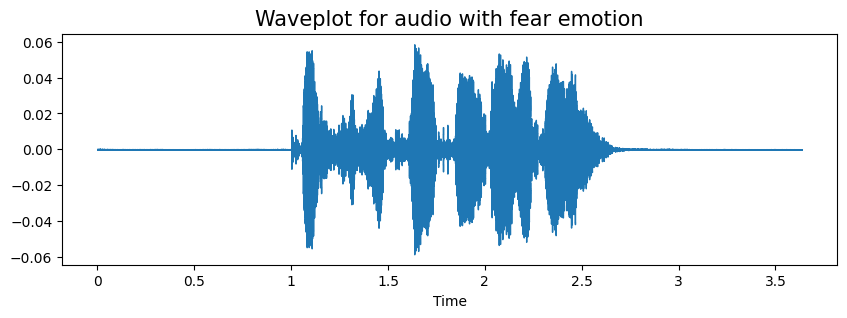

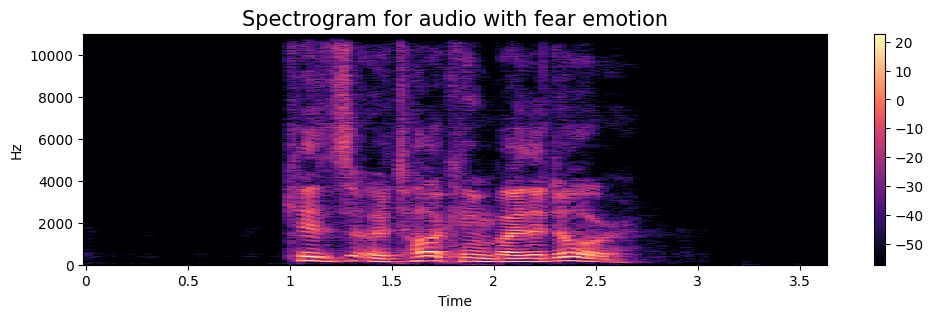

In [10]:
emotion="fear"
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
plt.figure(figsize=(12, 4))
create_waveplot(data, sampling_rate,emotion)
create_spectrogram(data, sampling_rate,emotion)
Audio(path)

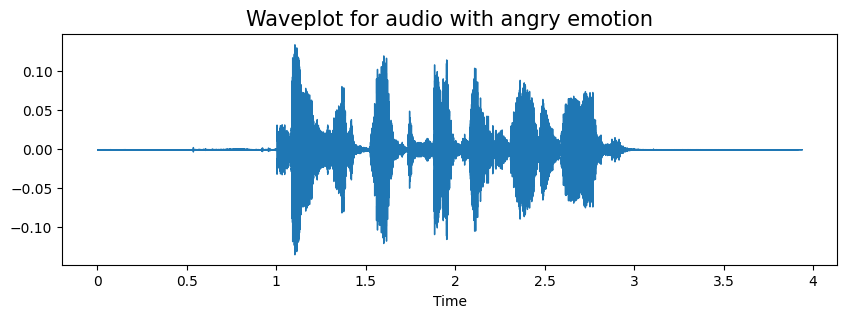

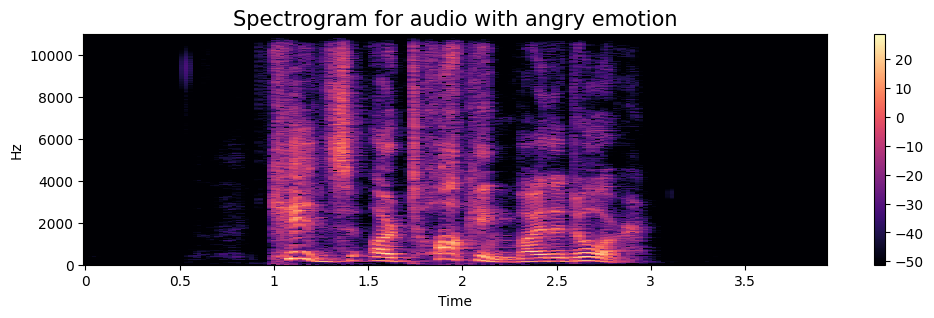

In [11]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

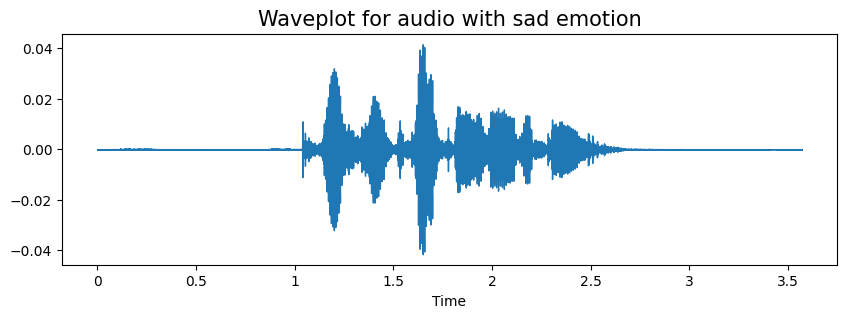

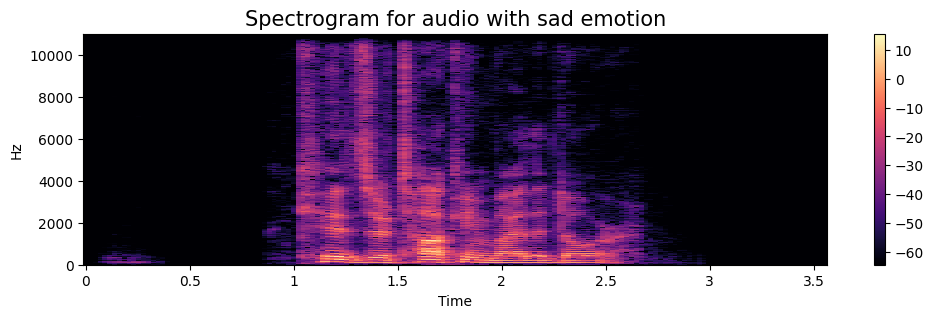

In [12]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

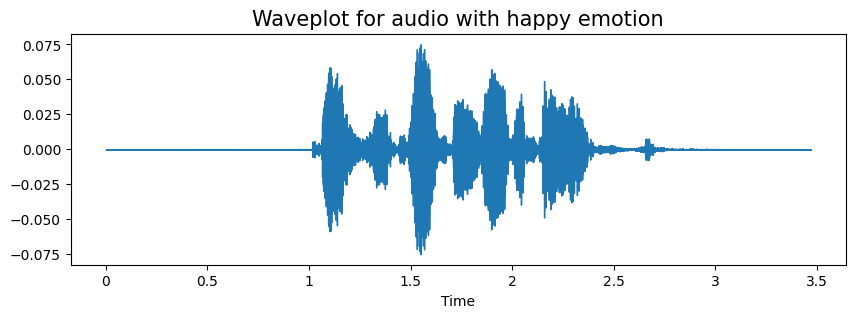

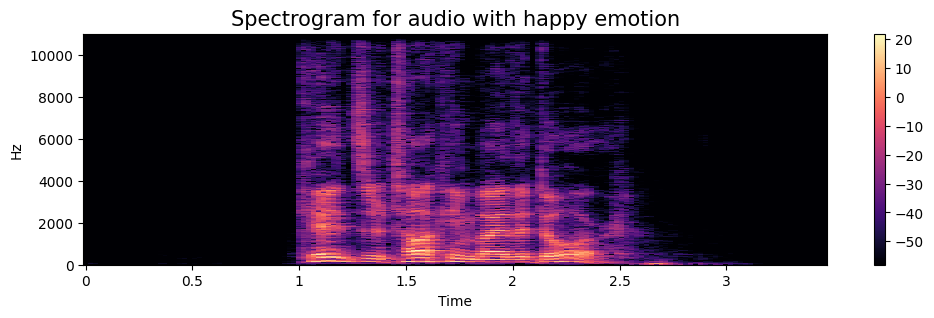

In [13]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [14]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sr=sampling_rate, n_steps=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=0.7)

path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

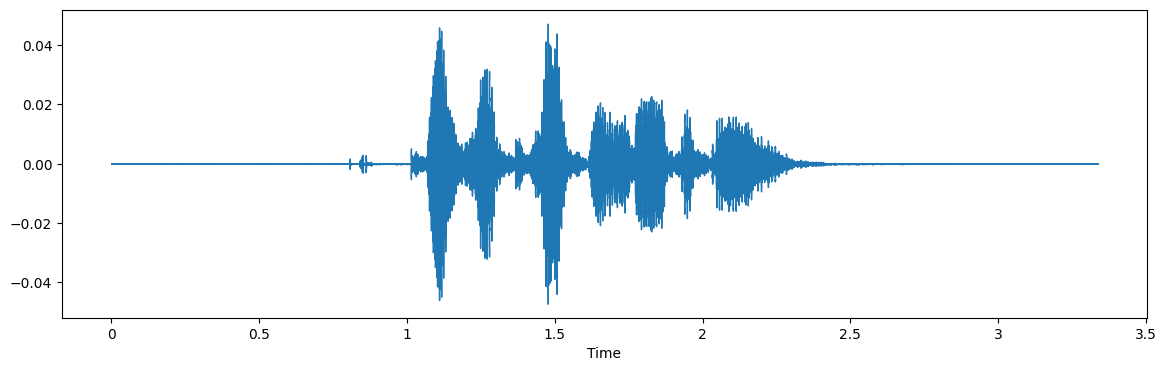

In [15]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

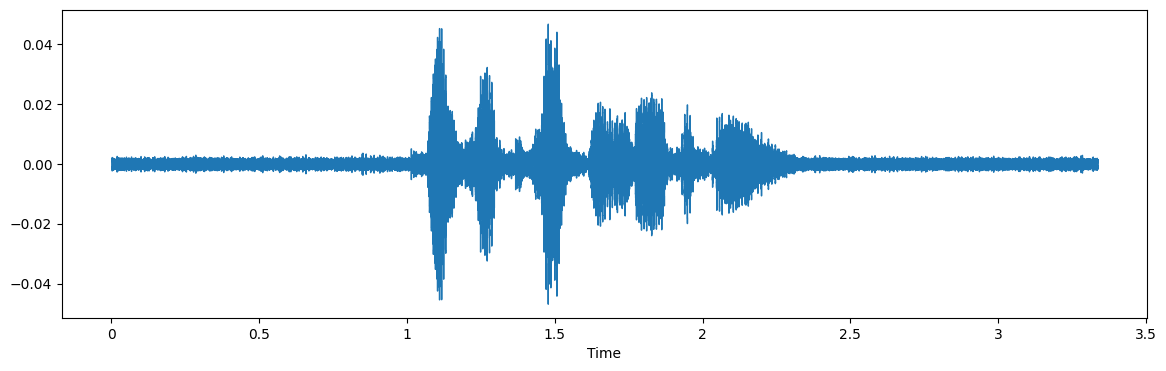

In [16]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

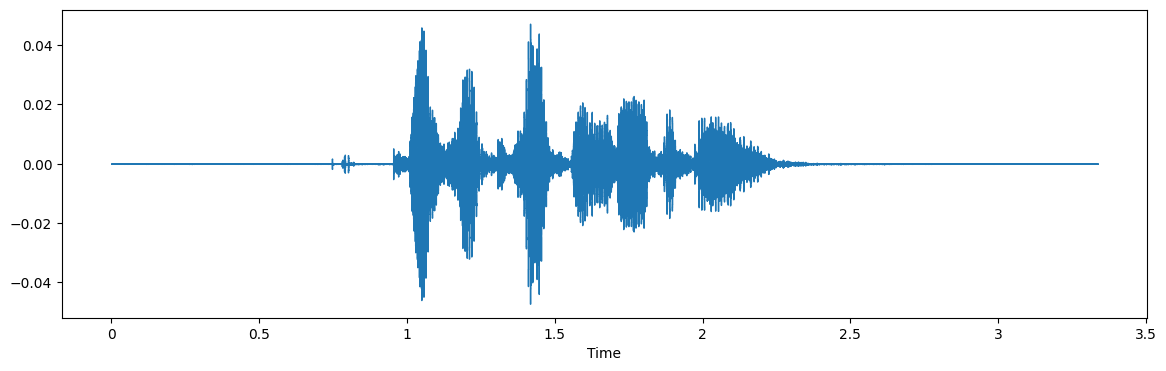

In [17]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [18]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr))

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) 

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) 

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) 
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) 
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) 
    
    return result

In [42]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [43]:
len(X), len(Y), data_path.Path.shape

(28086, 28086, (9362,))

In [44]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.321275,0.729664,0.750032,0.730624,0.735275,0.713529,0.660531,0.684966,0.733049,0.753971,...,4.310903e-06,3.291511e-06,2.148075e-06,2.279739e-06,5.116493e-06,8.190282e-06,0.000007,0.000005,4.245834e-07,neutral
1,0.328564,0.808295,0.844835,0.816499,0.818232,0.816401,0.731043,0.685022,0.723148,0.762111,...,9.915424e-05,9.503004e-05,9.602120e-05,9.834003e-05,9.880280e-05,9.925440e-05,0.000099,0.000101,1.006022e-04,neutral
2,0.188256,0.622128,0.699219,0.753332,0.721223,0.701737,0.682353,0.662828,0.686490,0.733966,...,8.576332e-07,9.576413e-07,7.733594e-07,5.233102e-07,3.592796e-07,9.261687e-07,0.000002,0.000001,7.753984e-08,neutral
3,0.293566,0.673896,0.722096,0.723508,0.682302,0.680533,0.675352,0.628977,0.679179,0.707283,...,6.984504e-06,7.034949e-06,6.654923e-06,6.979548e-06,1.214236e-05,9.640183e-06,0.000011,0.000006,4.254087e-07,neutral
4,0.306374,0.772838,0.809406,0.789819,0.775373,0.785466,0.709700,0.649395,0.700054,0.735448,...,4.266375e-05,4.260130e-05,4.211657e-05,4.429475e-05,4.987401e-05,4.693961e-05,0.000049,0.000045,3.980737e-05,neutral


In [45]:
#Data Preparation

In [46]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [47]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((21064, 162), (21064, 8), (7022, 162), (7022, 8))

In [49]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((21064, 162), (21064, 8), (7022, 162), (7022, 8))

In [50]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((21064, 162, 1), (21064, 8), (7022, 162, 1), (7022, 8))

In [51]:
#Modelling

In [52]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 162, 256)          1536      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 81, 256)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 41, 256)          0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 21, 128)         

In [53]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
330/330 [==============================] - 42s 122ms/step - loss: 1.7614 - accuracy: 0.2782 - val_loss: 1.6195 - val_accuracy: 0.3330 - lr: 0.0010
Epoch 2/50
330/330 [==============================] - 42s 127ms/step - loss: 1.6398 - accuracy: 0.3209 - val_loss: 1.5671 - val_accuracy: 0.3485 - lr: 0.0010
Epoch 3/50
330/330 [==============================] - 41s 123ms/step - loss: 1.5916 - accuracy: 0.3503 - val_loss: 1.5537 - val_accuracy: 0.3630 - lr: 0.0010
Epoch 4/50
330/330 [==============================] - 44s 134ms/step - loss: 1.5620 - accuracy: 0.3612 - val_loss: 1.5193 - val_accuracy: 0.3829 - lr: 0.0010
Epoch 5/50
330/330 [==============================] - 44s 133ms/step - loss: 1.5368 - accuracy: 0.3708 - val_loss: 1.4913 - val_accuracy: 0.3884 - lr: 0.0010
Epoch 6/50
330/330 [==============================] - 43s 131ms/step - loss: 1.5132 - accuracy: 0.3864 - val_loss: 1.4599 - val_accuracy: 0.4033 - lr: 0.0010
Epoch 7/50
330/330 [==============================] 

220/220 [==============================] - 4s 19ms/step - loss: 1.4057 - accuracy: 0.5006
Accuracy of our model on test data :  50.05696415901184 %


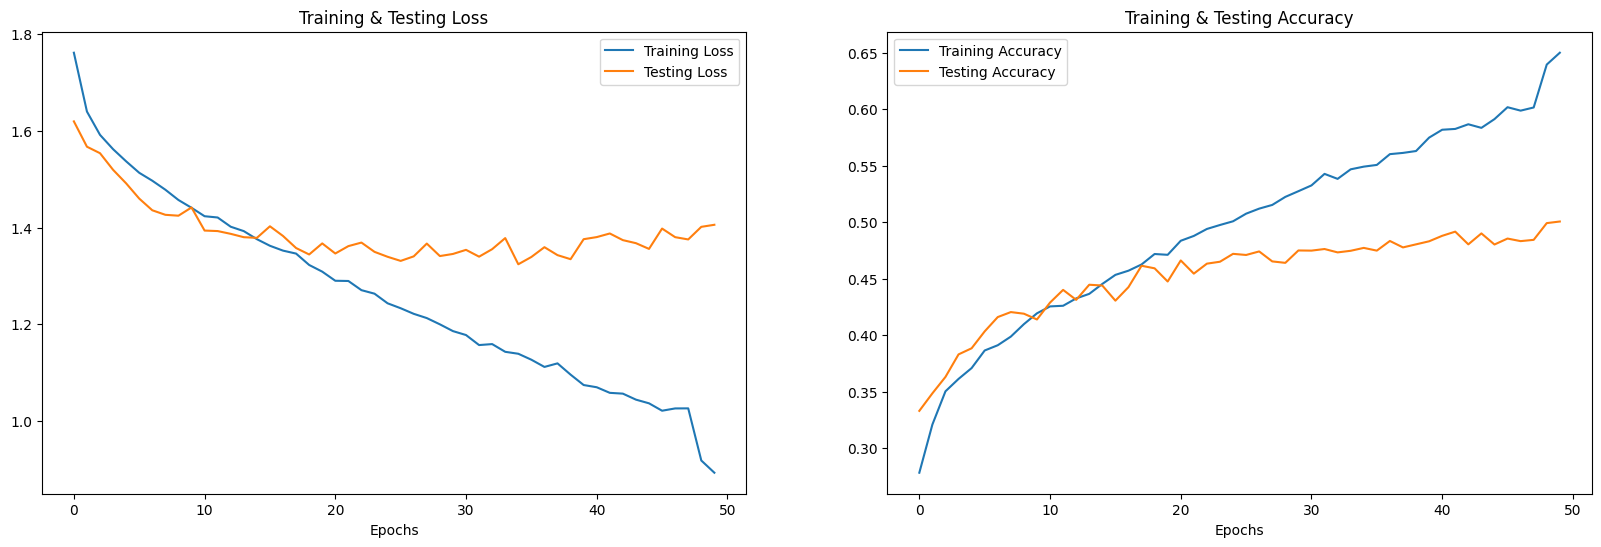

In [54]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [55]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

220/220 [==============================] - 4s 19ms/step


In [56]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,angry,angry
1,sad,sad
2,neutral,neutral
3,disgust,happy
4,sad,neutral
5,sad,fear
6,sad,sad
7,happy,disgust
8,neutral,neutral
9,happy,happy


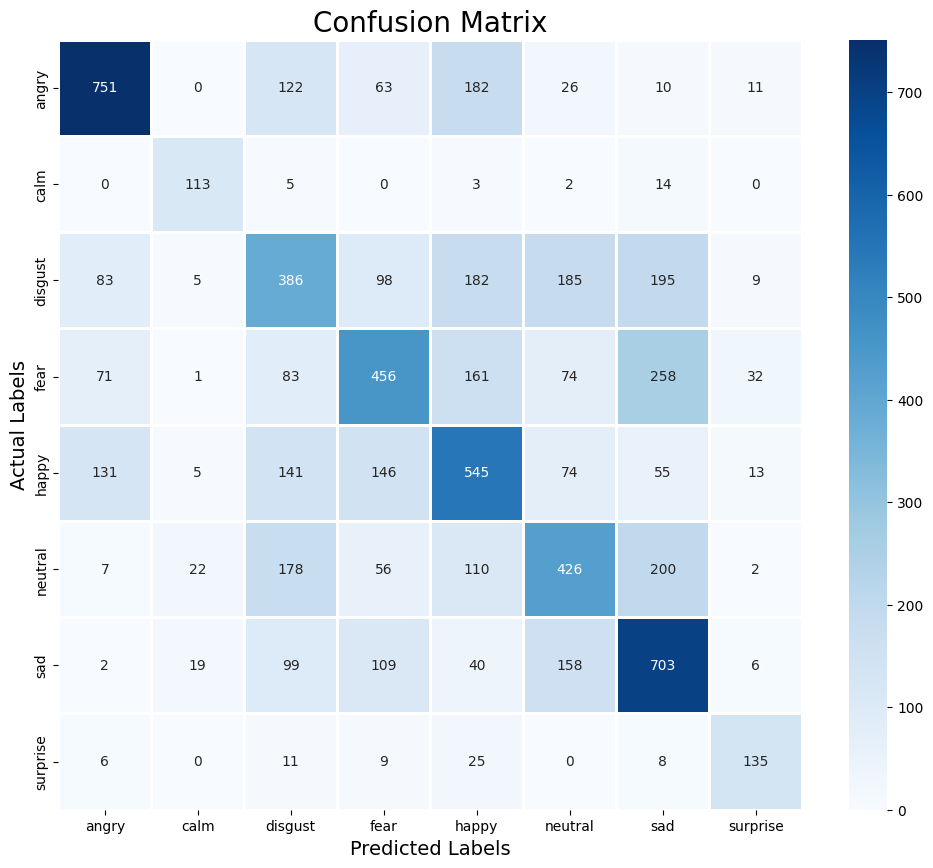

In [57]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.71      0.64      0.68      1165
        calm       0.68      0.82      0.75       137
     disgust       0.38      0.34      0.36      1143
        fear       0.49      0.40      0.44      1136
       happy       0.44      0.49      0.46      1110
     neutral       0.45      0.43      0.44      1001
         sad       0.49      0.62      0.55      1136
    surprise       0.65      0.70      0.67       194

    accuracy                           0.50      7022
   macro avg       0.54      0.55      0.54      7022
weighted avg       0.50      0.50      0.50      7022

